In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

# The Idea:
Does GALEX (NUV) flux show decline as stars age? 

To search for this, match the GALEX catalog to the Kepler rotation period catalog. As stars (within small temperature bins) spin-down (age, rotate slower) we would expect the NUV flux to decrease. Thus the (NUV - V), or (NUV - J) color should get *redder* with increasing rotation period

In [2]:
file = '1488562031338A.csv'
data = pd.read_csv(file)
data.columns

Index([u'angDist', u'_RAJ2000', u'_DEJ2000', u'Pl', u'GCK', u'RAJ2000',
       u'DEJ2000', u'NUVmag', u'e_NUVmag', u'NUVsn', u'dRad', u'KIC',
       u'_RAJ2000.1', u'_DEJ2000.1', u'KIC.1', u'Teff', u'log(g)', u'Mass',
       u'Prot', u'e_Prot', u'n_Prot', u'Rper', u'LPH', u'w', u'Ref', u'_RA',
       u'_DE'],
      dtype='object')

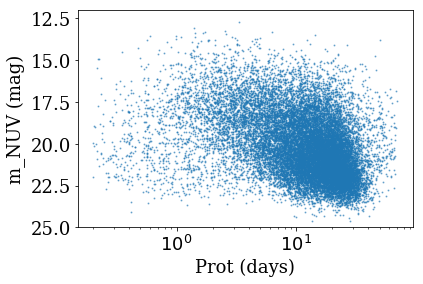

In [19]:
# T = np.where((data[u'Teff']) < 5500)

# this needs to be fixed for 2 things:
# 1) put in temperature bins
# 2) put in L_NUV/L_bol, or similar

plt.scatter(data[u'Prot'], data[u'NUVmag'], s=1, alpha=0.5)

plt.ylabel('m_NUV (mag)')
plt.ylim(25,12)
plt.xscale('log')
plt.xlabel('Prot (days)')

In [15]:
# data[u'Teff']

In [20]:
file = '1488604487591A.csv'
data2 = pd.read_csv(file)
data2.columns

/Users/james/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'angDist', u'angDist.1', u'_RAJ2000', u'_DEJ2000', u'Pl', u'GCK',
       u'RAJ2000', u'DEJ2000', u'NUVmag', u'e_NUVmag', u'NUVsn', u'dRad',
       u'KIC', u'_RAJ2000.1', u'_DEJ2000.1', u'KIC.1', u'Teff', u'log(g)',
       u'Mass', u'Prot', u'e_Prot', u'n_Prot', u'Rper', u'LPH', u'w', u'Ref',
       u'_RA', u'_DE', u'main_id', u'ra', u'dec', u'coo_err_maj',
       u'coo_err_min', u'coo_err_angle', u'nbref', u'ra_sexa', u'dec_sexa',
       u'main_type', u'other_types', u'radvel', u'redshift', u'sp_type',
       u'morph_type', u'plx', u'pmra', u'pmdec', u'size_maj', u'size_min',
       u'size_angle', u'B', u'V', u'R', u'J', u'H', u'K', u'u', u'g', u'r',
       u'i', u'z'],
      dtype='object')

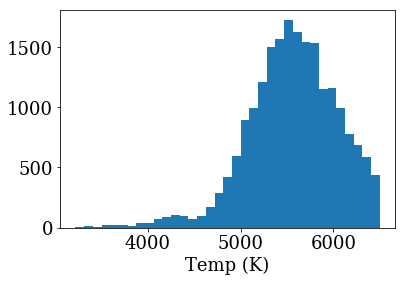

In [35]:
_ = plt.hist(data[u'Teff'], bins=35)
plt.xlabel('Temp (K)')

(9, 3)

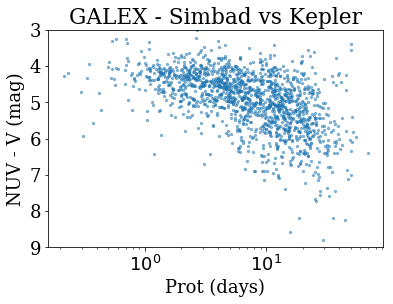

In [152]:
ok = np.where((data2[u'NUVmag']<20) & (data2[u'J']<16))
plt.scatter(data2[u'Prot'].values[ok], data2[u'NUVmag'].values[ok] - data2[u'V'].values[ok],
            s=5, alpha=0.5)
plt.ylabel('NUV - V (mag)')
plt.title('GALEX - Simbad vs Kepler')
plt.xscale('log')
plt.xlabel('Prot (days)')
plt.ylim(9,3)

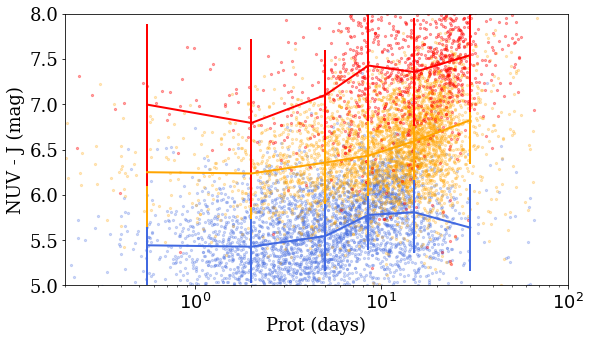

In [153]:
plt.figure(figsize=(9,5))

Pbins = np.array([0.1, 1, 3, 7, 10, 20, 40])

ok = np.where((data2[u'Teff'] >= 6000) & 
              (data2[u'NUVmag']<20) & (data2[u'J']<16))
plt.scatter(data2[u'Prot'].values[ok], 
            data2[u'NUVmag'].values[ok] - data2[u'J'].values[ok], 
            s=5, alpha=0.25, c='RoyalBlue')
UVclr = np.zeros(len(Pbins) - 1)
UVstd = np.zeros(len(Pbins) - 1)
for i in range(len(Pbins)-1):
    iok = np.where((data2[u'Prot'].values[ok] >= Pbins[i]) & (data2[u'Prot'].values[ok] < Pbins[i+1]))[0]
    UVclr[i] = np.median(data2[u'NUVmag'].values[ok][iok] - data2[u'J'].values[ok][iok])
    UVstd[i] = np.std(data2[u'NUVmag'].values[ok][iok] - data2[u'J'].values[ok][iok])
plt.errorbar((Pbins[1:] + Pbins[:-1])/2., UVclr, yerr=UVstd, c='RoyalBlue', lw=2)


ok = np.where((data2[u'Teff'] >= 5500) & (data2[u'Teff'] < 6000) & 
              (data2[u'NUVmag']<20) & (data2[u'J']<16))
plt.scatter(data2[u'Prot'].values[ok], 
            data2[u'NUVmag'].values[ok] - data2[u'J'].values[ok], 
            s=5, alpha=0.25, c='orange')
UVclr = np.zeros(len(Pbins) - 1)
for i in range(len(Pbins)-1):
    iok = np.where((data2[u'Prot'].values[ok] >= Pbins[i]) & (data2[u'Prot'].values[ok] < Pbins[i+1]))[0]
    UVclr[i] = np.median(data2[u'NUVmag'].values[ok][iok] - data2[u'J'].values[ok][iok])
    UVstd[i] = np.std(data2[u'NUVmag'].values[ok][iok] - data2[u'J'].values[ok][iok])
plt.errorbar((Pbins[1:] + Pbins[:-1])/2., UVclr, yerr=UVstd, c='orange', lw=2)



ok = np.where((data2[u'Teff'] >= 5000) & (data2[u'Teff'] < 5500) & 
              (data2[u'NUVmag']<20) & (data2[u'J']<16))
plt.scatter(data2[u'Prot'].values[ok], 
            data2[u'NUVmag'].values[ok] - data2[u'J'].values[ok], 
            s=5, alpha=0.35, c='red')
UVclr = np.zeros(len(Pbins) - 1)
for i in range(len(Pbins)-1):
    iok = np.where((data2[u'Prot'].values[ok] >= Pbins[i]) & (data2[u'Prot'].values[ok] < Pbins[i+1]))[0]
    UVclr[i] = np.median(data2[u'NUVmag'].values[ok][iok] - data2[u'J'].values[ok][iok])
    UVstd[i] = np.std(data2[u'NUVmag'].values[ok][iok] - data2[u'J'].values[ok][iok])
plt.errorbar((Pbins[1:] + Pbins[:-1])/2., UVclr, yerr=UVstd, c='red', lw=2)



plt.ylim(5,8)
plt.xlim(2e-1,1e2)
plt.ylabel('NUV - J (mag)')
plt.xscale('log')
plt.xlabel('Prot (days)')

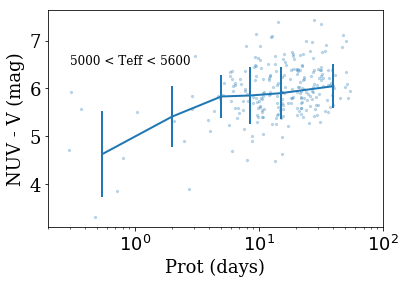

In [177]:
Pbins = np.array([0.1, 1, 3, 7, 10, 20, 60])

ok = np.where((data2[u'Teff'] >= 5000) & (data2[u'Teff'] < 5600) & 
              (data2[u'NUVmag'] < 20.) & np.isfinite(data2[u'V']))

plt.scatter(data2[u'Prot'].values[ok], 
            data2[u'NUVmag'].values[ok] - data2[u'V'].values[ok], 
            s=5, alpha=0.25)
UVclr = np.zeros(len(Pbins) - 1)
UVstd = np.zeros(len(Pbins) - 1)
for i in range(len(Pbins)-1):
    iok = np.where((data2[u'Prot'].values[ok] >= Pbins[i]) & (data2[u'Prot'].values[ok] < Pbins[i+1]))[0]
    UVclr[i] = np.median(data2[u'NUVmag'].values[ok][iok] - data2[u'V'].values[ok][iok])
    UVstd[i] = np.std(data2[u'NUVmag'].values[ok][iok] - data2[u'V'].values[ok][iok])
plt.errorbar((Pbins[1:] + Pbins[:-1])/2., UVclr, yerr=UVstd, lw=2)

# plt.ylim(5,8)
plt.xlim(2e-1,1e2)
plt.ylabel('NUV - V (mag)')
plt.xscale('log')
plt.xlabel('Prot (days)')
plt.text(0.3, 6.5, '5000 < Teff < 5600', fontsize=12)
plt.savefig('galex_rot_test1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

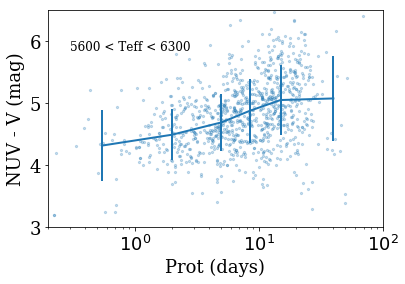

In [185]:
Pbins = np.array([0.1, 1, 3, 7, 10, 20, 60])

ok = np.where((data2[u'Teff'] >= 5600) & (data2[u'Teff'] < 6300) & 
              (data2[u'NUVmag'] < 20.) & np.isfinite(data2[u'V']))

plt.scatter(data2[u'Prot'].values[ok], 
            data2[u'NUVmag'].values[ok] - data2[u'V'].values[ok], 
            s=5, alpha=0.25)
UVclr = np.zeros(len(Pbins) - 1)
UVstd = np.zeros(len(Pbins) - 1)
for i in range(len(Pbins)-1):
    iok = np.where((data2[u'Prot'].values[ok] >= Pbins[i]) & (data2[u'Prot'].values[ok] < Pbins[i+1]))[0]
    UVclr[i] = np.median(data2[u'NUVmag'].values[ok][iok] - data2[u'V'].values[ok][iok])
    UVstd[i] = np.std(data2[u'NUVmag'].values[ok][iok] - data2[u'V'].values[ok][iok])
plt.errorbar((Pbins[1:] + Pbins[:-1])/2., UVclr, yerr=UVstd, lw=2)

plt.ylim(3, 6.5)
plt.xlim(2e-1,1e2)
plt.ylabel('NUV - V (mag)')
plt.xscale('log')
plt.xlabel('Prot (days)')
plt.text(0.3, 5.85, '5600 < Teff < 6300', fontsize=12)
plt.savefig('galex_rot_test2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

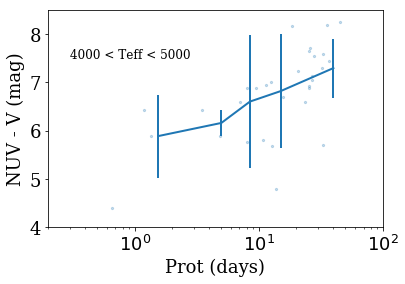

In [182]:
Pbins = np.array([0.1, 3, 7, 10, 20, 60])

ok = np.where((data2[u'Teff'] >= 4000) & (data2[u'Teff'] < 5000) & 
              (data2[u'NUVmag'] < 20.) & np.isfinite(data2[u'V']))

plt.scatter(data2[u'Prot'].values[ok], 
            data2[u'NUVmag'].values[ok] - data2[u'V'].values[ok], 
            s=5, alpha=0.25)
UVclr = np.zeros(len(Pbins) - 1)
UVstd = np.zeros(len(Pbins) - 1)
for i in range(len(Pbins)-1):
    iok = np.where((data2[u'Prot'].values[ok] >= Pbins[i]) & (data2[u'Prot'].values[ok] < Pbins[i+1]))[0]
    UVclr[i] = np.median(data2[u'NUVmag'].values[ok][iok] - data2[u'V'].values[ok][iok])
    UVstd[i] = np.std(data2[u'NUVmag'].values[ok][iok] - data2[u'V'].values[ok][iok])
plt.errorbar((Pbins[1:] + Pbins[:-1])/2., UVclr, yerr=UVstd, lw=2)

plt.ylim(4, 8.5)
plt.xlim(2e-1,1e2)
plt.ylabel('NUV - V (mag)')
plt.xscale('log')
plt.xlabel('Prot (days)')
plt.text(0.3, 7.5, '4000 < Teff < 5000', fontsize=12)
plt.savefig('galex_rot_test0.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

## Result so far:
The large scatter initially seen in (NUV - V) is due to more red stars populating the slower rotation periods.

BUT, when you bin in to smaller temperature ranges... you still don't see much significant evolution of (NUV - J). 

(NUV - V) actually looks somewhat promising, e.g. see this last figure for just 1 temperature bin.

**Also we should recast this as Rossby number, not rotation period...**